In [1]:
!pip install scikit-learn numpy pandas seaborn matplotlib

In [2]:
#Importamos las librerias necesarias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

In [3]:
#Leemos nuestro dataset
df = pd.read_csv('C:\\Users\\Pak\\Downloads\\news\\news.csv')

#Veamos como es nuestro df
print(df.describe())

print(df.shape)

print(df.head())

         Unnamed: 0
count   6335.000000
mean    5280.415627
std     3038.503953
min        2.000000
25%     2674.500000
50%     5271.000000
75%     7901.000000
max    10557.000000
(6335, 4)
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [4]:
#Nos enfocaremos en la columna 'label'
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [5]:
#Separamos nuestro dataset
x_train, x_test, y_train, y_test = train_test_split(df.text, labels, test_size=0.2, random_state=6)

In [6]:
#Inicializamos nuestro modelo con una frecuencia de aparecer en el documento del 0.7
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit-Transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [7]:
#Iniciamos un PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

#Predecimos en el test set y calculamos accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.63%


In [8]:
#Por último, veamos nuestra matriz de confusión
cf = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
cf

array([[592,  26],
       [ 42, 607]], dtype=int64)

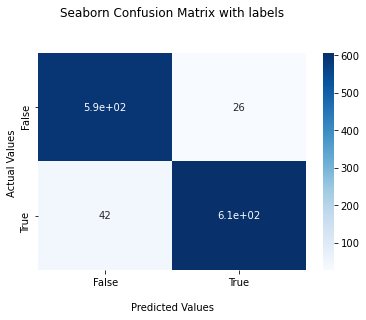

In [9]:
ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()